In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.shape

(506, 13)

In [10]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
bos.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [15]:
x = bos.iloc[:,:12]
y = bos.iloc[:,12]

In [16]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [17]:
y.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: 12, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

30.12216865364308
[ 9.89555733e-02  1.43814864e-02  9.23862966e-02 -1.00967491e+00
  5.17942939e+00 -4.40813712e+00  8.88490368e-02  1.51203756e-01
  4.66394573e-02 -1.13616392e-03  1.17150285e-01 -8.21168411e-03]


In [28]:
import seaborn as sns

C:\Users\Icon\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


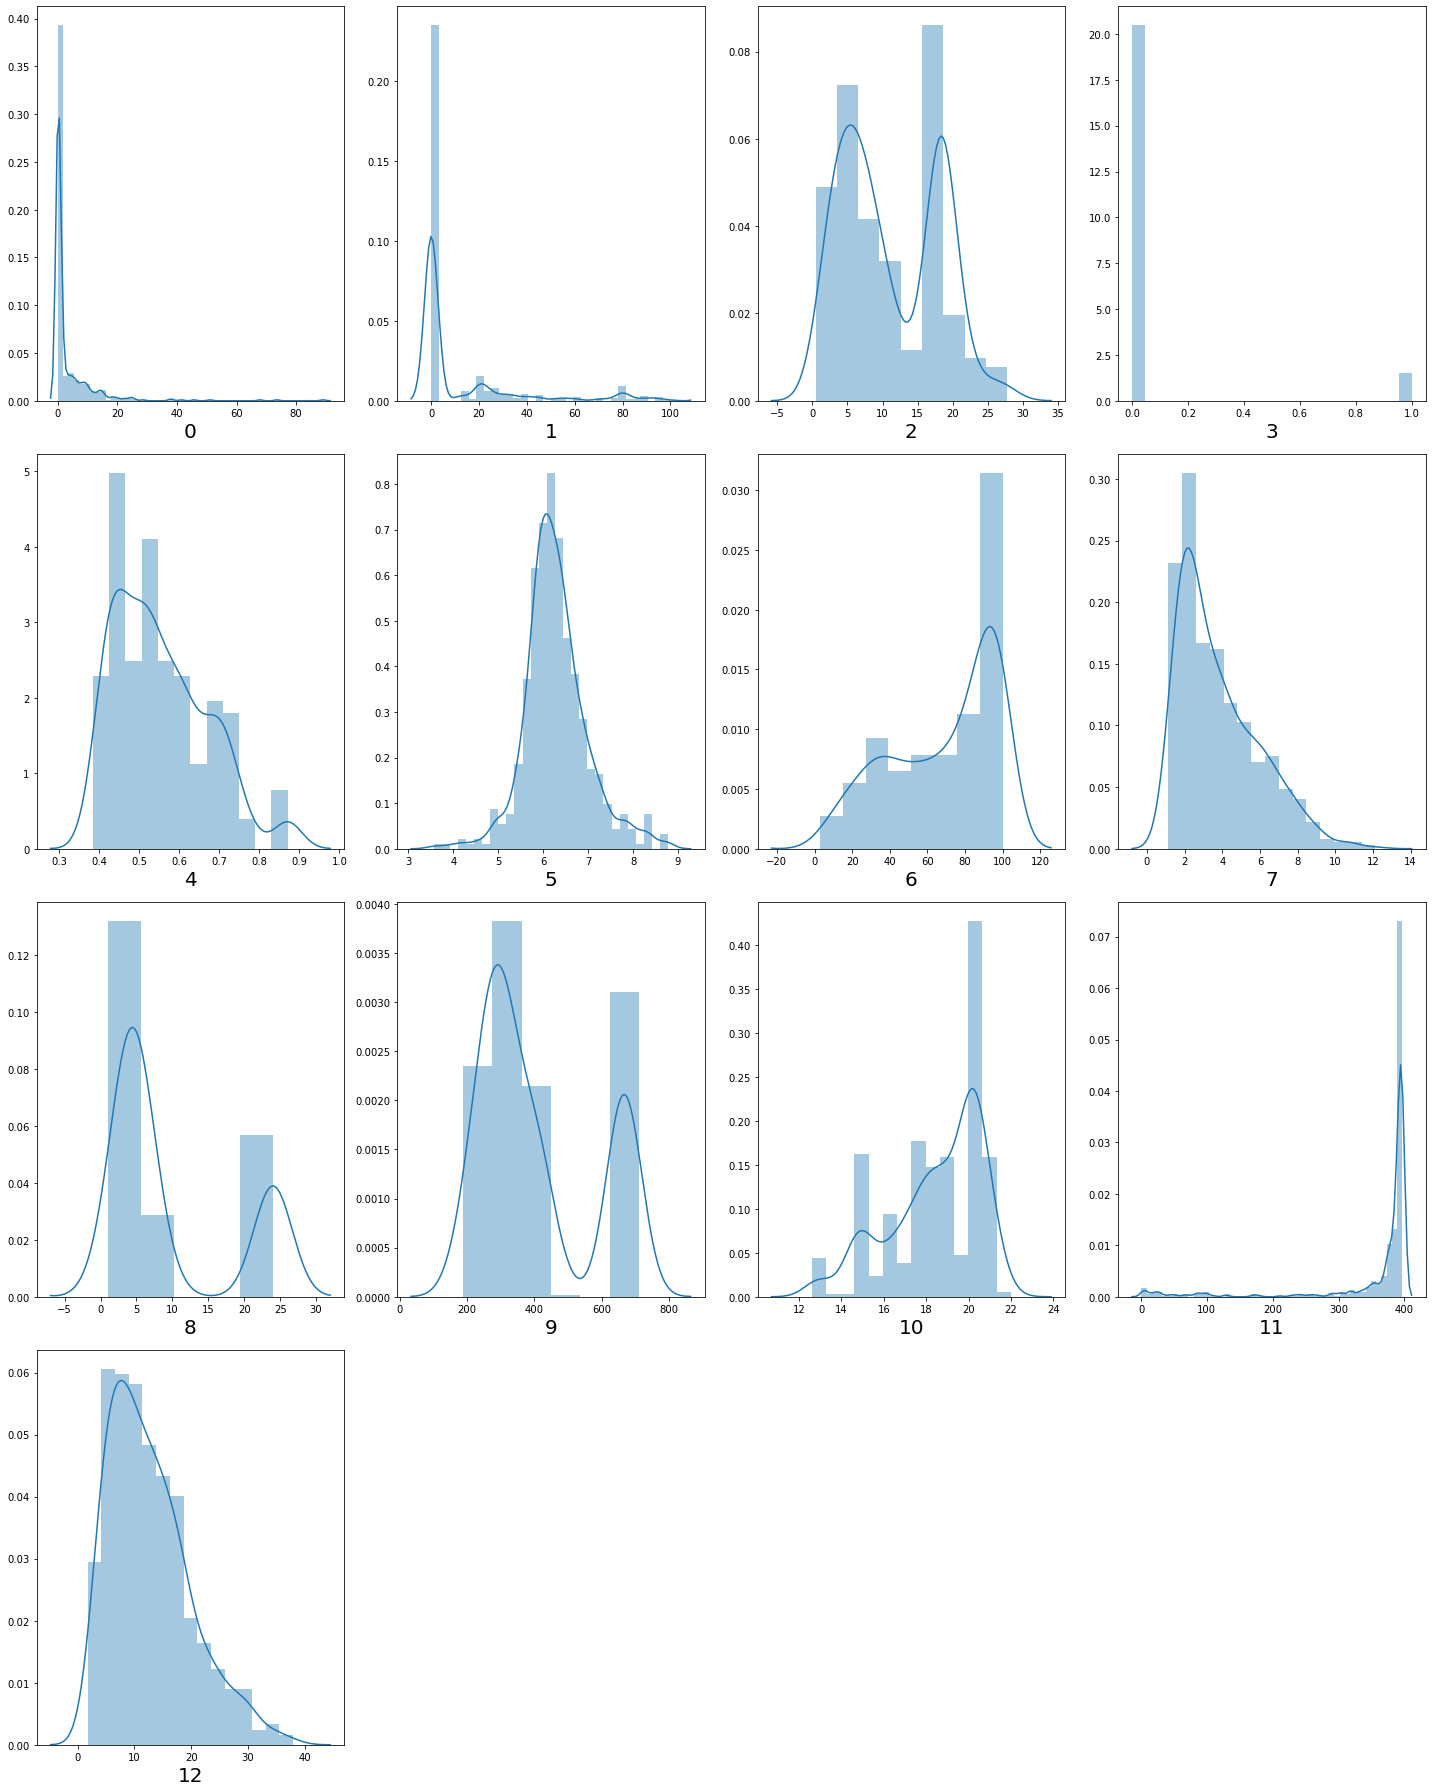

In [30]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber = 1
for column in bos:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1 
plt.tight_layout()

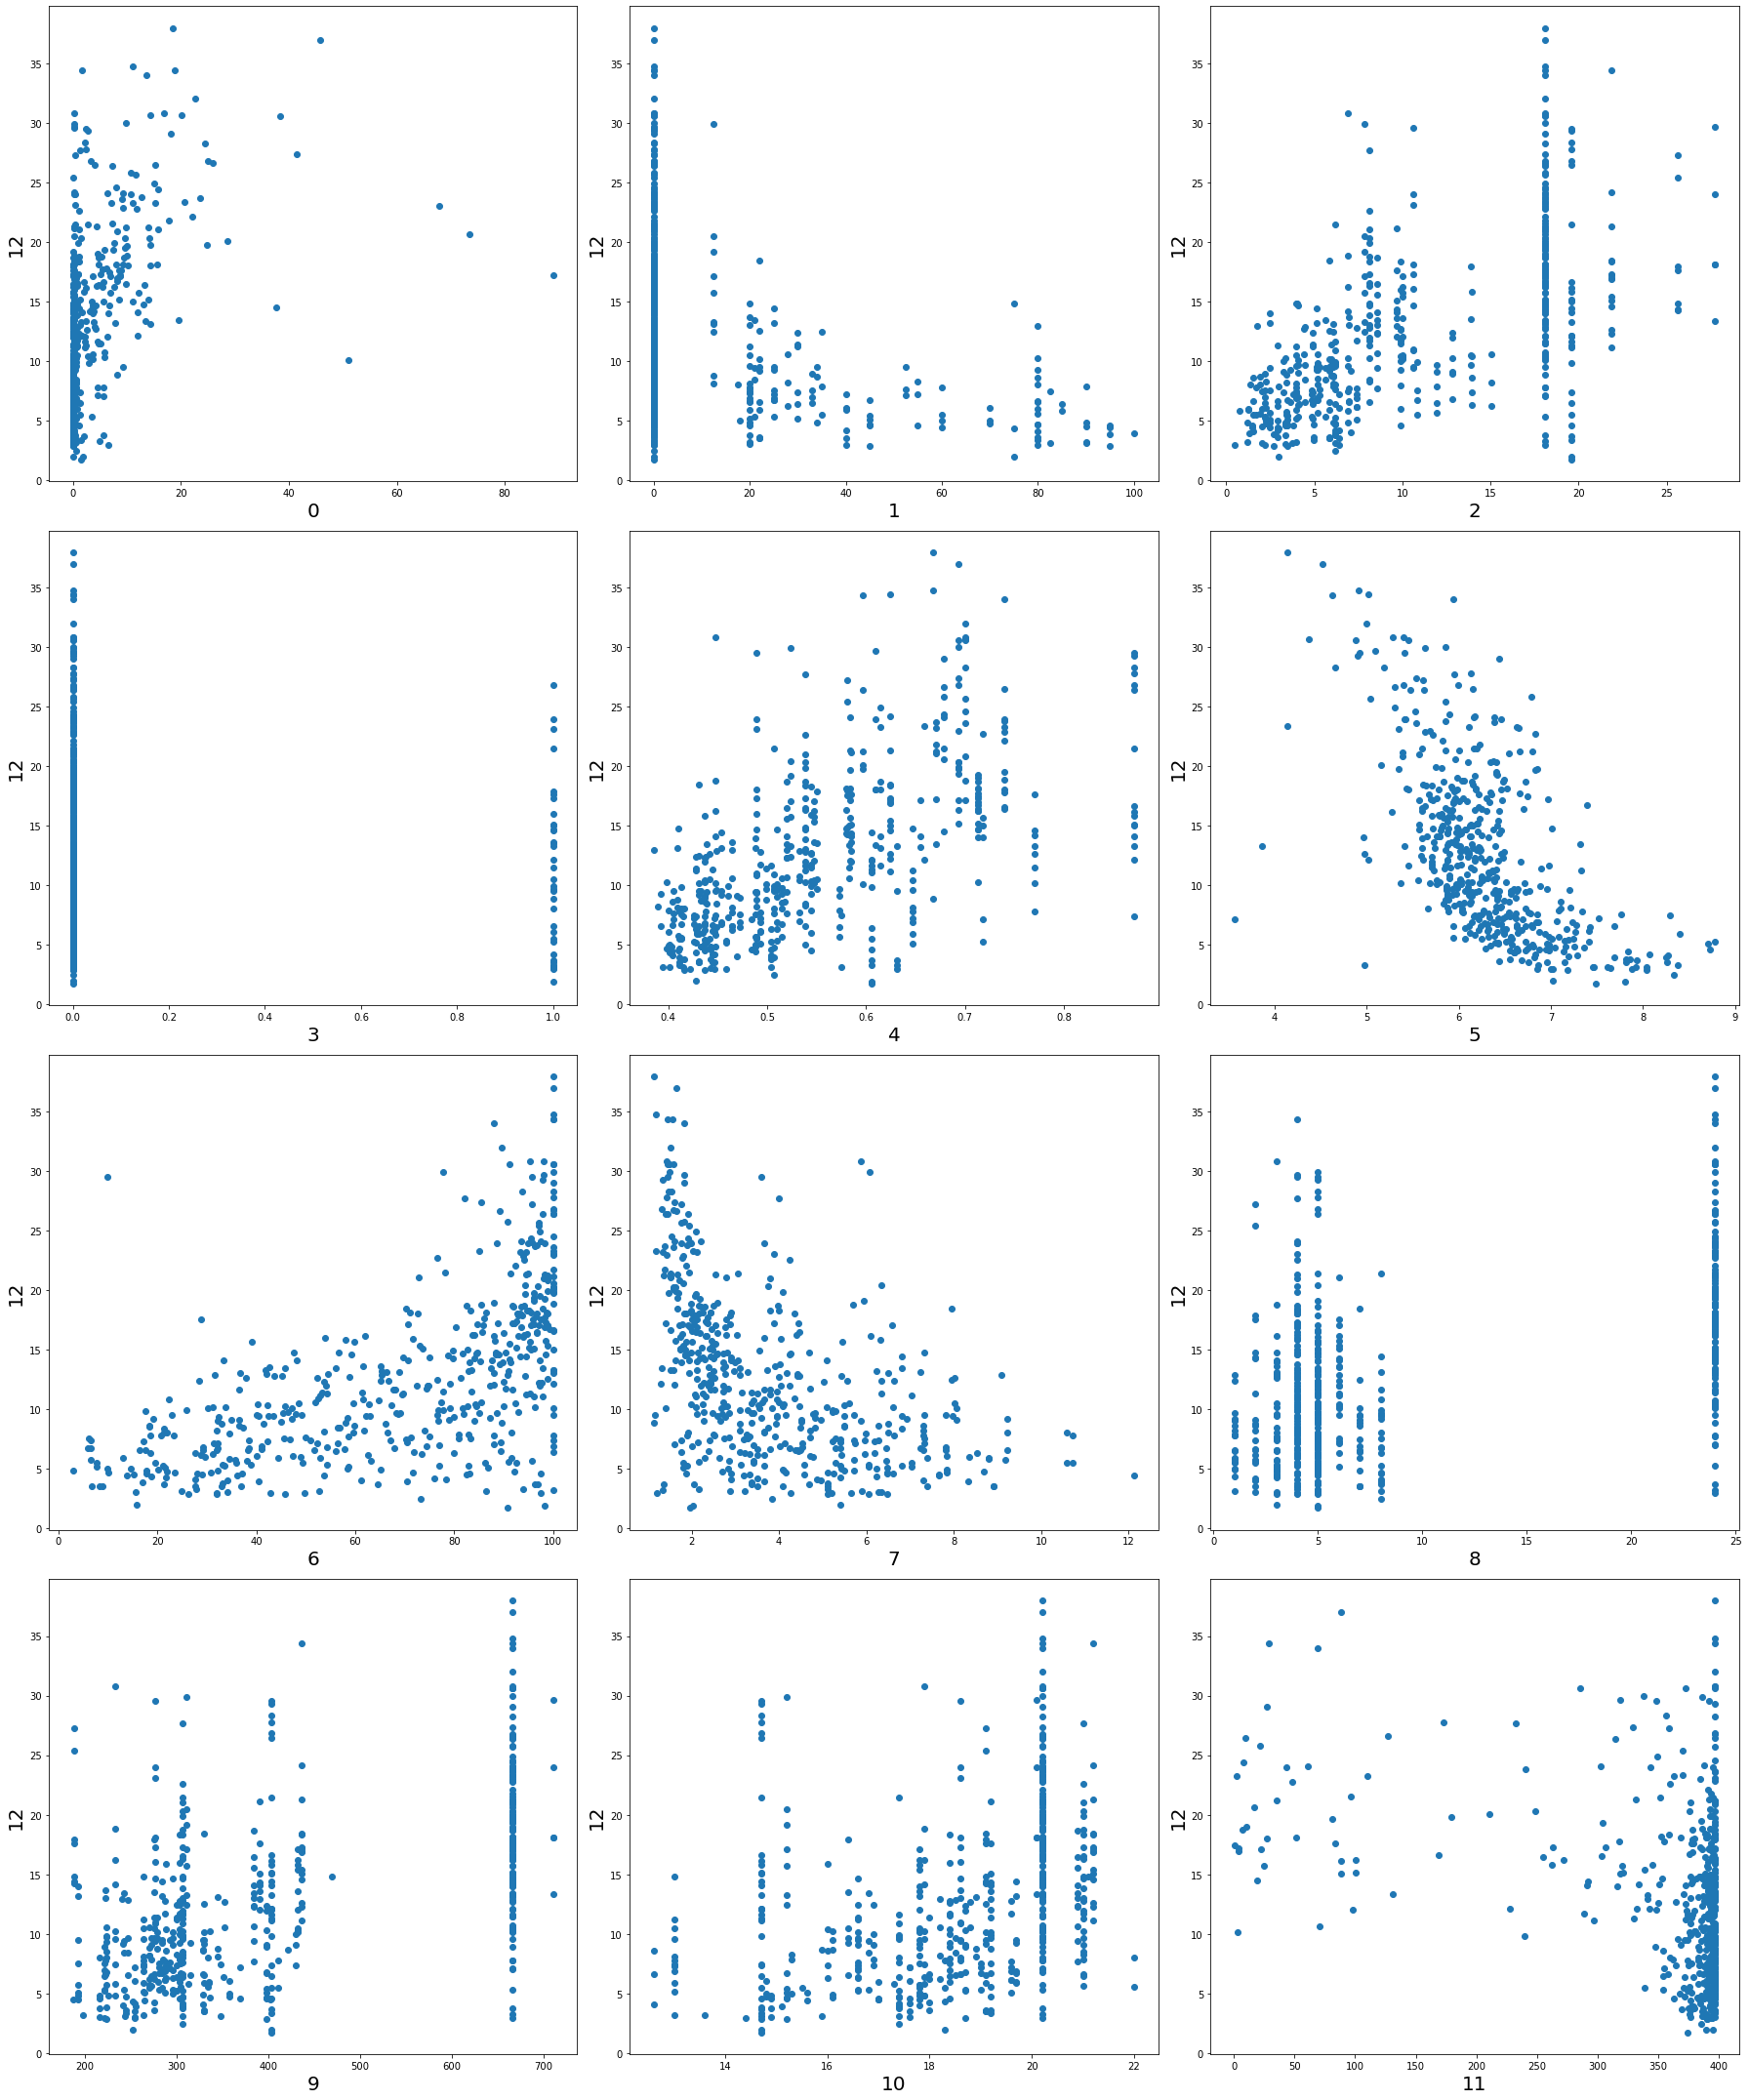

In [34]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1
for column in x:
    if plotnumber <= 15:
        ax = plt.subplot(4,3,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel(12, fontsize=20)
    plotnumber+= 1
plt.tight_layout()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = x.columns

In [44]:
vif

,VIF,Features
0,1.750401,0
1,2.292269,1
2,3.968425,2
3,1.070202,3
4,4.372942,4
5,1.380407,5
6,2.740023,6
7,3.950097,7
8,7.474983,8
9,9.006439,9


In [41]:
range(bos.shape[1])

range(0, 13)

In [50]:
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.66660821,
        -1.45900038,  0.44105193],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415,  0.44105193],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415,  0.39642699],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583,  0.44105193],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583,  0.4032249 ],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583,  0.44105193]])

In [51]:
y

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: 12, Length: 506, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

In [55]:
x_train

array([[-0.37252742, -0.48772236, -0.72032214, ..., -0.6012761 ,
        -0.48803915,  0.16891656],
       [ 0.6486058 , -0.48772236,  1.01599907, ...,  1.53092646,
         0.80657583,  0.44105193],
       [-0.30549062, -0.48772236, -0.43725801, ..., -0.6012761 ,
         1.17646583,  0.41517605],
       ...,
       [-0.4133465 , -0.48772236, -0.98441806, ..., -0.33400837,
         0.15926834,  0.0870128 ],
       [-0.38094354, -0.48772236,  1.56899549, ...,  0.17083068,
         1.26893833,  0.42065823],
       [-0.41490939,  2.94584308, -1.09385007, ..., -0.55376183,
        -0.95040164,  0.39708486]])

In [56]:
x_test

array([[-0.40296135, -0.48772236,  2.42256516, ...,  1.79819419,
         0.76033959,  0.42120644],
       [-0.38264608, -0.48772236,  1.56899549, ...,  0.17083068,
         1.26893833,  0.44105193],
       [-0.41247486,  1.4436582 , -1.12303194, ..., -0.06080135,
        -1.50523663,  0.3622182 ],
       ...,
       [-0.41613247,  2.94584308, -1.40317788, ..., -0.47061187,
        -2.70737911,  0.38951945],
       [ 7.48364564, -0.48772236,  1.01599907, ...,  1.53092646,
         0.80657583,  0.31024714],
       [-0.41379104, -0.48772236, -1.2660231 , ..., -1.27835435,
        -0.30309415,  0.44105193]])

In [57]:
y_train

227     6.36
382    23.60
23     19.88
348     5.99
157     4.59
       ...  
291     3.56
501     9.67
346    12.67
130    12.60
254     6.57
Name: 12, Length: 379, dtype: float64

In [58]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [60]:
import pickle
filename = 'finalised_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [61]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [67]:
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(scaler.transform([[0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296, 15.3, 396.9]]))
a

array([9.0793874])

In [68]:
regression.score(x_train, y_train)

0.6907215996033398

In [69]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [70]:
adj_r2(x_train, y_train)

0.6805813241804984

In [71]:
regression.score(x_test, y_test)

0.5433227816551134

In [72]:
adj_r2(x_test, y_test)

0.4952514955135464

In [74]:
# Lasso regularization
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
lasscv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [75]:
alpha = lasscv.alpha_
alpha

0.010128424709289523

In [76]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.010128424709289523)

In [78]:
lasso_reg.score(x_test, y_test)

0.5438900470180581

In [79]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([6.43827414, 9.21018007, 9.42986409, 4.71708933, 9.133039  ,
       2.48276623, 1.74879419, 2.92989785, 7.65831584, 1.12321906,
       9.50968821, 6.01899687, 7.21032678, 1.14947075, 4.74809909,
       7.8122369 , 5.91415507, 0.0825943 , 6.33783159, 0.97042396,
       5.52749132, 2.03933953, 1.51031929, 4.34812643, 3.5793374 ,
       9.76114347, 1.03747505, 2.27689274, 5.27711703, 4.58729839,
       9.79850536, 9.78180746, 2.13560974, 5.21126059, 9.96225074,
       8.88075463, 2.64073255, 3.92480841, 0.65590264, 6.44040626,
       1.21827273, 8.40871303, 7.39742096, 0.76540024, 8.45950103,
       0.36474857, 3.59872319, 2.50957888, 9.61201479, 6.46795783]),
        cv=10, normalize=True)

In [81]:
ridgecv.alpha_

0.08259429520587447

In [82]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.08259429520587447)

In [84]:
ridge_model.score(x_test, y_test)

0.543351584730544

In [85]:
elasticCV = ElasticNetCV(alphas=None, cv=10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [86]:
elasticCV.alpha_

0.14881787939477004

In [87]:
elasticCV.l1_ratio

0.5

In [88]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.14881787939477004)

In [91]:
elasticnet_reg.score(x_test, y_test)

0.553520987732012